In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from functools import reduce

In [2]:
lambda_list=['1', '5e-1', '1e-1', '5e-2', '1e-2', '5e-3', '1e-3']

In [3]:
def get_test_loss(solver):
    data_frames = []
    for l2 in lambda_list:
        log = 'matlab-log/'+"sol_"+ solver +"_gpu_1_l2_"+ l2 +"_d_40_t_100_eta_0.3_cgt_20_time_1.csv"
        df = pd.read_csv(log)
        df = df[["iter", "test_loss"]]
        df = df.rename(columns = {'test_loss': l2})
        data_frames.append(df)
    return reduce(lambda left,right: pd.merge(left,right,on=['iter'], how='outer'), data_frames)
def get_obj(solver):
    data_frames = []
    for l2 in lambda_list:
        log = 'matlab-log/'+"sol_"+ solver +"_gpu_1_l2_"+ l2 +"_d_40_t_100_eta_0.3_cgt_20_time_1.csv"
        df = pd.read_csv(log)
        df = df[["iter", "obj"]]
        df = df.rename(columns = {"obj": l2})
        data_frames.append(df)
    return reduce(lambda left,right: pd.merge(left,right,on=['iter'], how='outer'), data_frames)

In [4]:
# Take min of each lambda
data0 = get_test_loss('0').drop(columns=['iter']).min().to_frame(name="Gauss")
data1 = get_test_loss('1').drop(columns=['iter']).min().to_frame(name="ALS_CG")
# Merge on row index, which is lambda
data = pd.merge(data0, data1, left_index=True, right_index=True)
data = data.reset_index()
data = data.rename(columns = {"index": "lambda"})
data.head()

,lambda,Gauss,ALS_CG
0,1,1.356622,1.355997
1,5e-1,1.040204,1.039645
2,1e-1,0.858753,0.853112
3,5e-2,0.833028,0.840362
4,1e-2,0.850708,0.905983


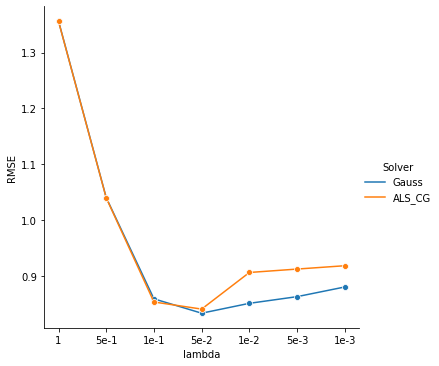

In [5]:
data = data.melt(id_vars="lambda", var_name="Solver", value_name="RMSE")
g = sns.relplot(x="lambda", y="RMSE", hue="Solver", kind="line", marker='o', data=data)
g.savefig("fig/fig7-RMSE.png")

In [6]:
# Take min of each lambda
data0 = get_obj('0').drop(columns=['iter']).min().to_frame(name="Gauss")
data1 = get_obj('1').drop(columns=['iter']).min().to_frame(name="ALS_CG")
# Merge on row index, which is lambda
data = pd.merge(data0, data1, left_index=True, right_index=True)
data = data.reset_index()
data = data.rename(columns = {"index": "lambda"})
# Calculate relative difference
data['rel_diff'] = (data['Gauss'] - data['ALS_CG']) / data['ALS_CG']
data.head()

,lambda,Gauss,ALS_CG,rel_diff
0,1,3.185687e+07,3.185686e+07,2.893568e-07
1,5e-1,1.880868e+07,1.880867e+07,5.314571e-07
2,1e-1,6.456149e+06,6.448123e+06,1.244599e-03
3,5e-2,4.427776e+06,4.412677e+06,3.421600e-03
4,1e-2,2.277839e+06,2.344569e+06,-2.846178e-02


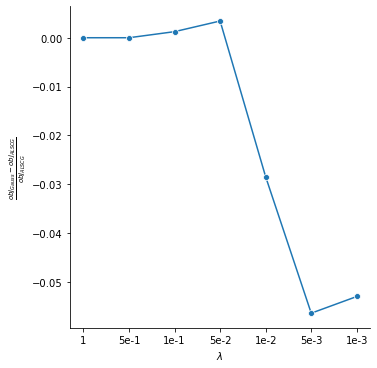

In [7]:
g = sns.relplot(x="lambda", y="rel_diff", kind="line", marker='o', data=data)
g.ax.set(xlabel=r'$\lambda$', ylabel=r"$\frac{obj_{Gauss} - obj_{ALSCG}}{obj_{ALSCG}}$")
g.savefig("fig/fig7-obj.png")